In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

In [32]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [33]:
df['species'].replace(['versicolor','setosa','virginica'],[1,0,2],inplace=True)

/tmp/ipython-input-1875844731.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['species'].replace(['versicolor','setosa','virginica'],[1,0,2],inplace=True)
/tmp/ipython-input-1875844731.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'].replace(['versicolor','setosa','virginica'

In [34]:
df = df.drop_duplicates()

In [35]:
df = df.dropna()
print (df.drop_duplicates)

<bound method DataFrame.drop_duplicates of      sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[147 rows x 5 columns]>


In [36]:
X = df[['sepal_length', 'sepal_width' , 'petal_length','petal_width']]
y = df['species']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [38]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [39]:
y_pred = model.predict(X_test)
y_pred

array([2, 1, 2, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1, 2,
       1])

In [40]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[17,  0,  0],
       [ 0, 12,  0],
       [ 0,  1, 15]])

In [41]:
print(confusion_matrix.__doc__)

Compute confusion matrix to evaluate the accuracy of a classification.

    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.

    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

    Read more in the :ref:`User Guide <confusion_matrix>`.

    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.

    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.

    labels : array-like of shape (n_classes), default=None
        List of labels to index the matrix. This may be used to reorder
        or select a subset of labels.
        If ``None`` is given, those that appear at least once
        in ``y

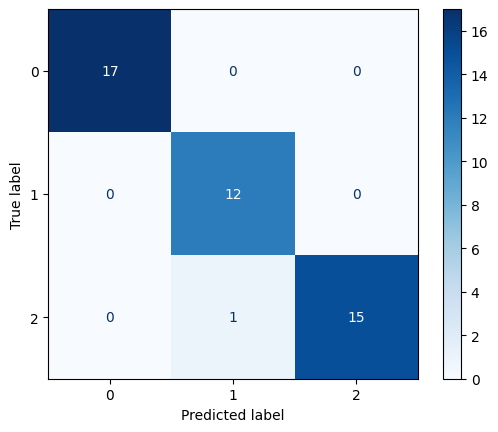

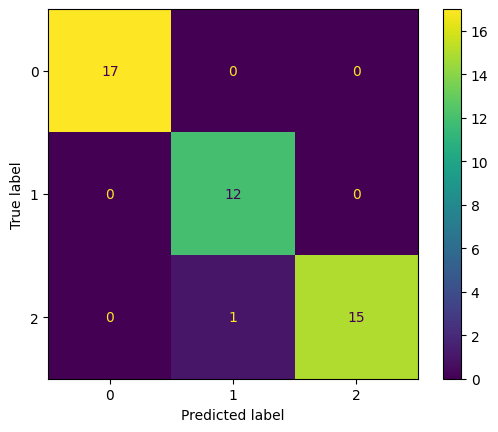

In [42]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues)
disp.plot()
plt.show()

In [43]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9777777777777777

In [48]:
precision = precision_score(y_test, y_pred)
precision

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [45]:
recall = recall_score(y_test, y_pred, average='macro')
recall

0.9791666666666666

In [46]:
error_rate = 1 - accuracy
error_rate

0.022222222222222254

In [47]:
model.score(X_train,y_train)

0.9607843137254902